In [3]:
# Data handling libraries
import pandas as pd
import numpy as np


In [4]:
# Load the dataset from CSV file
df = pd.read_csv("daily_electricity_data.csv")

# Show first 5 rows
df.head()



,low_devices,low_hours,medium_devices,medium_hours,high_devices,high_hours,daily_kwh
0,7,2.284044,3,9.576601,0,14.727554,1.936
1,8,1.144091,4,11.669008,2,20.146181,15.664
2,6,5.322371,1,7.728185,0,1.162525,1.070
3,3,7.882616,3,6.134392,2,20.778629,13.988
4,7,1.455361,4,11.437741,0,23.209537,3.284


In [5]:
# Display dataset structure
print(df.info())

# Display number of rows and columns
print("Dataset shape:", df.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   low_devices     10000 non-null  int64  
 1   low_hours       10000 non-null  float64
 2   medium_devices  10000 non-null  int64  
 3   medium_hours    10000 non-null  float64
 4   high_devices    10000 non-null  int64  
 5   high_hours      10000 non-null  float64
 6   daily_kwh       10000 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 547.0 KB
None
Dataset shape: (10000, 7)


In [6]:
# Check missing values in each column
print("Missing values per column:")
print(df.isnull().sum())

# Check duplicate rows
print("Duplicate rows:", df.duplicated().sum())


Missing values per column:
low_devices       0
low_hours         0
medium_devices    0
medium_hours      0
high_devices      0
high_hours        0
daily_kwh         0
dtype: int64
Duplicate rows: 0


In [7]:
# Show statistical summary of numerical columns
df.describe()


,low_devices,low_hours,medium_devices,medium_hours,high_devices,high_hours,daily_kwh
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.001500,4.515827,2.017200,6.455670,1.001900,12.447300,5.079124
std,2.579683,2.018588,1.420953,3.199535,0.816801,6.620703,4.161536
min,1.000000,1.000059,0.000000,1.000338,0.000000,1.002729,0.000000
25%,3.000000,2.790748,1.000000,3.699163,0.000000,6.648672,1.644750
50%,5.000000,4.536989,2.000000,6.408660,1.000000,12.448954,4.001000
75%,7.000000,6.265935,3.000000,9.248529,2.000000,18.164426,7.483750
max,9.000000,7.999817,4.000000,11.999526,2.000000,23.997693,18.078000


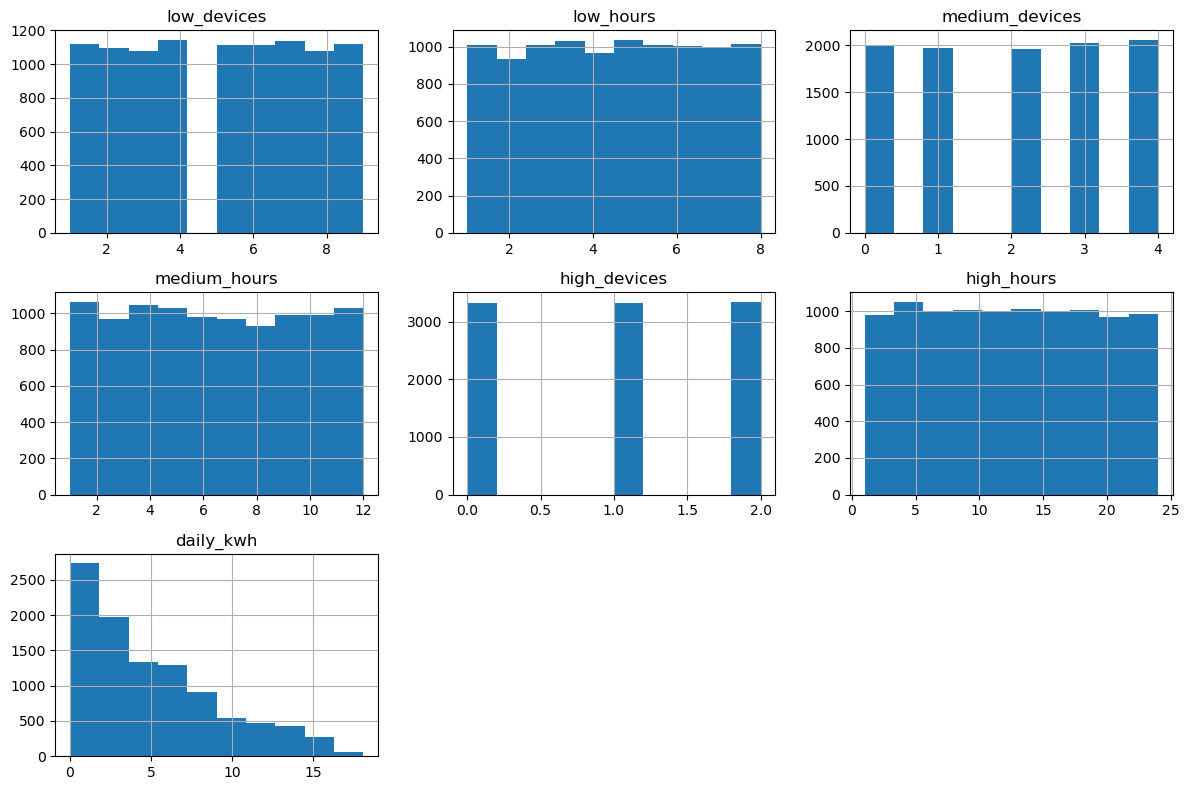

In [8]:
# Visualize distribution of features
import matplotlib.pyplot as plt

df.hist(figsize=(12,8))
plt.tight_layout()
plt.show()


In [10]:
# Create usage features
df["low_usage"] = df["low_devices"] * df["low_hours"]
df["medium_usage"] = df["medium_devices"] * df["medium_hours"]
df["high_usage"] = df["high_devices"] * df["high_hours"]

df.head()


,low_devices,low_hours,medium_devices,medium_hours,high_devices,high_hours,daily_kwh,low_usage,medium_usage,high_usage
0,7,2.284044,3,9.576601,0,14.727554,1.936,15.988305,28.729803,0.000000
1,8,1.144091,4,11.669008,2,20.146181,15.664,9.152732,46.676033,40.292361
2,6,5.322371,1,7.728185,0,1.162525,1.070,31.934223,7.728185,0.000000
3,3,7.882616,3,6.134392,2,20.778629,13.988,23.647849,18.403175,41.557259
4,7,1.455361,4,11.437741,0,23.209537,3.284,10.187528,45.750964,0.000000


In [11]:
# Input features (independent variables)
X = df[["low_usage", "medium_usage", "high_usage"]]

# Target variable (dependent variable)
y = df["daily_kwh"]

print("Input features:")
print(X.head())

print("\nTarget variable:")
print(y.head())


Input features:
   low_usage  medium_usage  high_usage
0  15.988305     28.729803    0.000000
1   9.152732     46.676033   40.292361
2  31.934223      7.728185    0.000000
3  23.647849     18.403175   41.557259
4  10.187528     45.750964    0.000000

Target variable:
0     1.936
1    15.664
2     1.070
3    13.988
4     3.284
Name: daily_kwh, dtype: float64


In [12]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,   
    random_state=1
)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))


Training samples: 7000
Testing samples: 3000


In [13]:
from sklearn.linear_model import LinearRegression

# Create model
model = LinearRegression()

# Train model
model.fit(X_train, y_train)

print("Model trained successfully")

# Show coefficients
print("Model coefficients:", model.coef_)


Model trained successfully
Model coefficients: [0.01497697 0.07460068 0.29907863]


In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)


MSE: 0.23932822831799294
MAE: 0.3887870773589577
RMSE: 0.4892118440082915
R2 Score: 0.9860667162437572


In [14]:
# Display regression coefficients
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

coefficients


,Feature,Coefficient
0,low_usage,0.014977
1,medium_usage,0.074601
2,high_usage,0.299079


In [15]:
# Example: one day usage
low_devices = 1
low_hours = 11

medium_devices = 0
medium_hours = 0

high_devices = 0
high_hours = 0

# Convert to usage features (same as training)
new_data = pd.DataFrame({
    "low_usage": [low_devices * low_hours],
    "medium_usage": [medium_devices * medium_hours],
    "high_usage": [high_devices * high_hours]
})

# Predict
prediction = model.predict(new_data)[0]

# Prevent negative values
prediction = max(prediction, 0)

print("Predicted daily electricity usage (kWh):", round(prediction, 3))


Predicted daily electricity usage (kWh): 0.193


In [16]:
import joblib

# Save trained model
joblib.dump(model, "daily_electricity_model.pkl")

print("Model saved successfully")


Model saved successfully
